In [1]:
# Section 1: Import Libraries

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
# Section 2: Load Dataset

(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("Training images shape:", X_train.shape)
print("Testing images shape:", X_test.shape)

Training images shape: (60000, 28, 28)
Testing images shape: (10000, 28, 28)


In [3]:
# Section 3: Preprocessing

# Normalize
X_train = X_train / 255.0
X_test = X_test / 255.0

# Reshape for CNN
X_train_cnn = X_train.reshape(-1,28,28,1)
X_test_cnn = X_test.reshape(-1,28,28,1)

# Flatten for Logistic Regression
X_train_flat = X_train.reshape(-1,28*28)
X_test_flat = X_test.reshape(-1,28*28)

print("CNN shape:", X_train_cnn.shape)
print("Flat shape:", X_train_flat.shape)

CNN shape: (60000, 28, 28, 1)
Flat shape: (60000, 784)


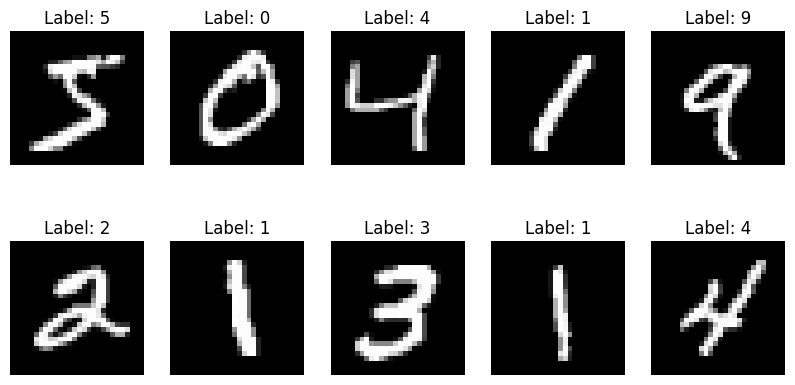

In [4]:
# Section 4: Visualization

import os

# Create outputs folder if not exists
if not os.path.exists("outputs"):
    os.makedirs("outputs")

plt.figure(figsize=(10,5))

for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title("Label: " + str(y_train[i]))
    plt.axis('off')

# Save image
plt.savefig("outputs/sample_digits.png")

plt.show()

In [5]:
# Section 5: Logistic Regression

lr_model = LogisticRegression(max_iter=1000)

lr_model.fit(X_train_flat, y_train)

lr_predictions = lr_model.predict(X_test_flat)

lr_accuracy = accuracy_score(y_test, lr_predictions)

print("Logistic Regression Accuracy:", lr_accuracy)

Logistic Regression Accuracy: 0.9259


In [6]:
# Section 6: CNN Model

cnn_model = Sequential()

cnn_model.add(Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)))
cnn_model.add(MaxPooling2D((2,2)))

cnn_model.add(Conv2D(64, (3,3), activation='relu'))
cnn_model.add(MaxPooling2D((2,2)))

cnn_model.add(Flatten())

cnn_model.add(Dense(128, activation='relu'))

cnn_model.add(Dense(10, activation='softmax'))

cnn_model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history = cnn_model.fit(
    X_train_cnn,
    y_train,
    epochs=5,
    validation_split=0.2
)

c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 36s 22ms/step - accuracy: 0.9550 - loss: 0.1500 - val_accuracy: 0.9823 - val_loss: 0.0613
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.9858 - loss: 0.0459 - val_accuracy: 0.9874 - val_loss: 0.0449
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 27s 18ms/step - accuracy: 0.9893 - loss: 0.0331 - val_accuracy: 0.9892 - val_loss: 0.0364
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 25s 17ms/step - accuracy: 0.9922 - loss: 0.0227 - val_accuracy: 0.9889 - val_loss: 0.0368
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 30s 20ms/step - accuracy: 0.9945 - loss: 0.0172 - val_accuracy: 0.9875 - val_loss: 0.0451


In [7]:
# Section 7: Evaluation

test_loss, cnn_accuracy = cnn_model.evaluate(X_test_cnn, y_test)

print("CNN Accuracy:", cnn_accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9875 - loss: 0.0406
CNN Accuracy: 0.987500011920929


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


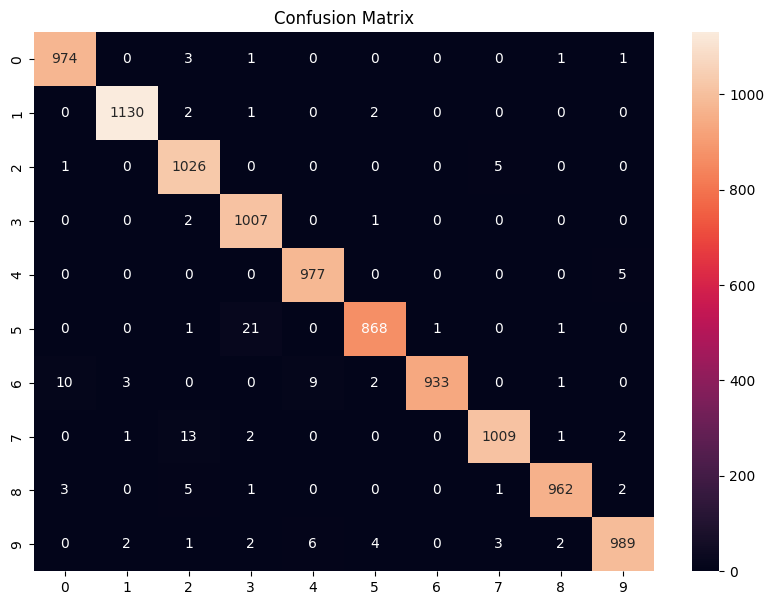

In [8]:
# Section 8: Confusion Matrix

cnn_predictions = cnn_model.predict(X_test_cnn)

cnn_pred_classes = np.argmax(cnn_predictions, axis=1)

cm = confusion_matrix(y_test, cnn_pred_classes)

plt.figure(figsize=(10,7))

sns.heatmap(cm, annot=True, fmt='d')

plt.title("Confusion Matrix")

plt.savefig("outputs/confusion_matrix.png")

plt.show()

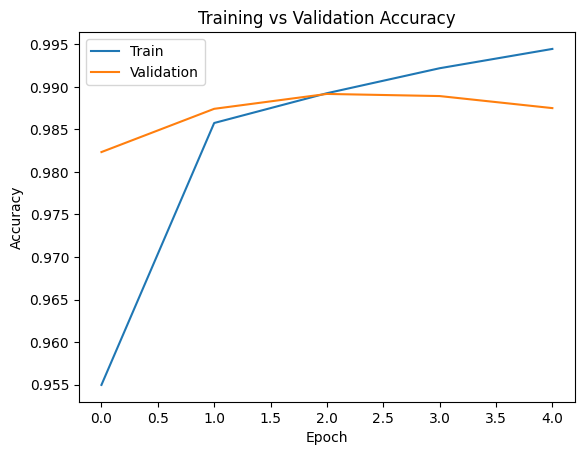

In [9]:
# Section 9: Accuracy Graph

plt.figure()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title("Training vs Validation Accuracy")

plt.xlabel("Epoch")
plt.ylabel("Accuracy")

plt.legend(["Train", "Validation"])

plt.savefig("outputs/accuracy_graph.png")

plt.show()

In [10]:
# Section 10: Save Model

if not os.path.exists("models"):
    os.makedirs("models")

cnn_model.save("models/mnist_cnn_model.h5")

print("Model saved successfully")

Model saved successfully


In [11]:
# Section 11: Comparison

print("Model Comparison")

print("Logistic Regression Accuracy:", lr_accuracy)
print("CNN Accuracy:", cnn_accuracy)

Model Comparison
Logistic Regression Accuracy: 0.9259
CNN Accuracy: 0.987500011920929
